In [2]:
# coding=utf-8
import pandas as pd
import numpy as np
from sklearn import preprocessing

df=pd.read_csv(r'./data/happiness_train_complete.csv',encoding='GB2312',index_col='id')

df = df[df["happiness"]>0]   #原表中幸福度非正的都是错误数据,可以剔除12条错误数据

df.dtypes[df.dtypes==object]  #查得有四列不是数据类型，需要对其进行转化
for i in range(df.dtypes[df.dtypes==object].shape[0]):
    print(df.dtypes[df.dtypes==object].index[i])
    
    
#转化四列数据，转换后df全为数值格式
df["survey_month"] = df["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df["survey_day"] = df["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df["survey_hour"] = df["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df=df.drop(columns='survey_time')

enc1=preprocessing.OrdinalEncoder()
enc2=preprocessing.OrdinalEncoder()
enc3=preprocessing.OrdinalEncoder()
df['edu_other']=enc1.fit_transform(df['edu_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc1.categories_)  #查看编码类型

df['property_other']=enc2.fit_transform(df['property_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc2.categories_)  #查看编码类型

df['invest_other']=enc3.fit_transform(df['invest_other'].fillna(0).transform(lambda x:str(x)).values.reshape(-1,1))
print(enc3.categories_)  #查看编码类型


#确定X和Y
X=df.drop(columns='happiness').fillna(0)
Y=df.happiness

survey_time
edu_other
property_other
invest_other
[array(['0', '夜校'], dtype=object)]
[array(['0', '两人共有', '两兄弟共有', '但目前房产证还没办下来', '兄弟三人共同所有', '兄弟共有', '全家人共同所有',
       '全家人共有', '全家共有', '全家所有', '共同所有', '共有', '农村没有产权，最近才开始办理',
       '原为配偶所有，配偶刚去世，还未办理转移手续', '受访者称该房全家人共有', '合建房', '多人共有', '多人拥有',
       '家人共有', '家人所有', '家庭共同所有', '家庭成员共有', '家庭成员所有', '小产权', '小产权房',
       '尚未办理房产证', '已购买，但未过户', '已购买，未过户', '待办', '户主所有', '房产证未办好',
       '才买，还无房产证', '拆迁分配，还没房产证', '无产权', '无房产证', '暂时没有房产证，已经开始办理了。',
       '未分家，全家所有', '未办', '未办理房产证', '未过户', '没办理房产证，未验收合格',
       '没时间和金钱过户，但是东西都在本人手里拿着', '没有产权', '没有产权，还没办理完手续', '没有房产证', '没有房产证。',
       '没有房照', '父亲共同所有', '祖宗', '自己房子被烧毁', '访户说是虹园新村大队分的房子', '还未过户',
       '还没办下房产证'], dtype=object)]
[array(['0', '个人融资', '储蓄存款', '其他理财产品', '商业万能保险', '字画、茶壶', '家中有部分土地承包出去',
       '彩票', '投资开发区', '投资服务业、家具业', '民间借贷', '没有', '活期储蓄', '理财', '理财产品',
       '福利车票', '租房', '统筹', '网上理财', '老人家不清楚', '自己没有，儿女不清楚', '银行存款',
       '银行存款利息', '银行理财', '高利贷'], dtype=object)]


In [2]:
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
#=============
#1、线性回归
#=============

#=============
#1.1、普通线性回归
#=============
reg1=linear_model.LinearRegression()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg1.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('normal_liner:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()


normal_liner:
[0.5218405862145089, 0.4852965015965814, 0.5628881992065076, 0.5314535604995132, 0.4744568322991874, 0.5188017606112356, 0.5693976215767934, 0.4845385085246459, 0.4835650851423975, 0.5085809076421898]
0.5140819563313561
-------------
[0.5794743429286608, 0.5506883604505632, 0.6420525657071339, 0.5894868585732165, 0.5193992490613266, 0.5794743429286608, 0.6245306633291614, 0.5569461827284106, 0.5526315789473685, 0.5852130325814536]
0.5779897177235955
-------------
[0.83729662077597, 0.8347934918648311, 0.9299123904881101, 0.8560700876095119, 0.8811013767209012, 0.8811013767209012, 0.918648310387985, 0.8710888610763454, 0.9172932330827067, 0.8395989974937343]
0.8766904746220998
-------------
[0.9086357947434293, 0.8760951188986232, 0.8961201501877347, 0.9098873591989988, 0.8347934918648311, 0.8648310387984981, 0.9173967459324155, 0.8448060075093867, 0.8245614035087719, 0.8671679197994987]
0.8744295030442188




In [3]:
#=============
#1.2、L1的lasso回归
#=============
reg2=linear_model.Lasso()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg2.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('Lasso:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()



Lasso:
[0.6908454965905734, 0.6833639432743945, 0.6813263778114521, 0.6367774189797439, 0.6236189455246643, 0.6007060953680261, 0.6395669020321127, 0.6251623294394346, 0.6069819797102257, 0.6577096239839919]
0.6446059112714619
-------------
[0.7409261576971214, 0.7409261576971214, 0.7321652065081352, 0.6795994993742178, 0.6695869837296621, 0.6307884856070087, 0.6683354192740926, 0.672090112640801, 0.6591478696741855, 0.7030075187969925]
0.6896573410999338
-------------
[1.2853566958698373, 1.2528160200250313, 1.2690863579474343, 1.2403003754693367, 1.2690863579474343, 1.2841051314142677, 1.2715894868585733, 1.1364205256570714, 1.2418546365914787, 1.2969924812030076]
1.2547608068983471
-------------
[0.8210262828535669, 0.8335419274092616, 0.8172715894868585, 0.7759699624530664, 0.7571964956195244, 0.7321652065081352, 0.7647058823529411, 0.7747183979974969, 0.7355889724310777, 0.8258145363408521]
0.7837999253452781




In [4]:
#=============
#1.3、L2的岭回归
#=============
reg3=linear_model.Ridge()
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
#mes1是未取整，mes2是四舍五入取整,mes3是向下取整，mes4是向上取整
mes1=[]
mes2=[]
mes3=[]
mes4=[]
kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg3.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    e2=metrics.mean_squared_error(np.round(y_pred),y_test)
    e3=metrics.mean_squared_error(np.trunc(y_pred),y_test)
    e4=metrics.mean_squared_error(np.ceil(y_pred),y_test)
    mes1.append(e1)
    mes2.append(e2)
    mes3.append(e3)
    mes4.append(e4)
print('Ridge:')
print(mes1)
print(np.mean(mes1))
print('-------------')
print(mes2)
print(np.mean(mes2))
print('-------------')
print(mes3)
print(np.mean(mes3))
print('-------------')
print(mes4)
print(np.mean(mes4))
print()
print()


D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6104e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64623e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64179e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.41335e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.41695e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill

Ridge:
[0.5920229485602891, 0.5308140333957159, 0.5328015766745535, 0.5143436268763157, 0.4882420834893624, 0.490855493850893, 0.526943965214319, 0.509719538579143, 0.46653110310796475, 0.5005389643472219]
0.5152813334095778
-------------
[0.6583229036295369, 0.5807259073842302, 0.6120150187734669, 0.6020025031289111, 0.5556946182728411, 0.5569461827284106, 0.5757196495619524, 0.55819774718398, 0.5363408521303258, 0.5827067669172933]
0.5818672149710948
-------------
[0.9574468085106383, 0.9136420525657072, 0.8648310387984981, 0.8873591989987485, 0.8773466833541927, 0.8235294117647058, 0.9286608260325406, 0.8548185231539425, 0.8358395989974937, 0.8546365914786967]
0.8798110733655164
-------------
[0.9386733416770964, 0.9073842302878599, 0.9211514392991239, 0.853566958698373, 0.8485607008760951, 0.8272841051314143, 0.867334167709637, 0.8811013767209012, 0.8208020050125313, 0.8571428571428571]
0.8723001182555888




D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6596e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.41546e-17): result may not be accurate.
  overwrite_a=True).T
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.97319e-17): result may not be accurate.
  overwrite_a=True).T


In [5]:

#=============
#1.4、逻辑回归
#=============
reg4=linear_model.LogisticRegression(penalty='l2',solver='saga') #正则会导致准确率下降，所以不正则
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes1=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=reg4.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes1.append(e1)
print('LR:')
print(mes1)
print(np.mean(mes1))
print()
print()


D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class wil

LR:
[0.7496871088861077, 0.6770963704630788, 0.7058823529411765, 0.6520650813516896, 0.6332916145181476, 0.7158948685857321, 0.6971214017521903, 0.690863579474343, 0.7230576441102757, 0.631578947368421]
0.6876538969451162




In [6]:
from sklearn import metrics
from sklearn import svm
from sklearn import model_selection
#=============
#2、SVM
#=============
clf2=svm.SVC()   #gamma和C都是默认值，没有调参
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf2.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('SVM:')
print(mes)
print(np.mean(mes))
print()
print()


D:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default valu

SVM:
[0.6570713391739674, 0.6520650813516896, 0.737171464330413, 0.6770963704630788, 0.655819774718398, 0.6307884856070087, 0.6470588235294118, 0.718397997496871, 0.7481203007518797, 0.7531328320802005]
0.6876722469502918




In [7]:
from sklearn import metrics
from sklearn import neighbors
from sklearn import model_selection
#=============
#3、KNN
#=============

for n in range(10,101,10):    #K值肯定会造成影响
    clf3=neighbors.KNeighborsClassifier(n_neighbors=n)  
    #交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
    mes=[]

    kf=model_selection.KFold(10,shuffle=True)
    for train,test in kf.split(X):
        X_train = X.iloc[train]
        y_train = Y.iloc[train]
        X_test = X.iloc[test]
        y_test = Y.iloc[test]

        y_pred=clf3.fit(X_train,y_train).predict(X_test)
        e1=metrics.mean_squared_error(y_pred,y_test)
        mes.append(e1)
    print('KNN(n=%d):'%n)
    print(mes)
    print(np.mean(mes))
    print()
    print()


KNN(n=10):
[0.8235294117647058, 0.8135168961201502, 0.7609511889862328, 0.7897371714643304, 0.8923654568210263, 0.8473091364205256, 0.6871088861076345, 0.7884856070087609, 0.7807017543859649, 0.7142857142857143]
0.7897991223365046


KNN(n=20):
[0.6370463078848561, 0.6833541927409261, 0.8172715894868585, 0.7033792240300375, 0.8035043804755945, 0.6458072590738423, 0.6921151439299124, 0.851063829787234, 0.6641604010025063, 0.62531328320802]
0.7123015611619788


KNN(n=30):
[0.7271589486858573, 0.704630788485607, 0.6195244055068836, 0.7221526908635795, 0.6783479349186483, 0.7033792240300375, 0.704630788485607, 0.7284105131414268, 0.6090225563909775, 0.7330827067669173]
0.6930340557275542


KNN(n=40):
[0.723404255319149, 0.688360450563204, 0.6370463078848561, 0.6182728410513142, 0.7008760951188986, 0.6307884856070087, 0.718397997496871, 0.7634543178973717, 0.7080200501253133, 0.7092731829573935]
0.689789398402138


KNN(n=50):
[0.6770963704630788, 0.7434292866082604, 0.6770963704630788, 0.664

In [8]:
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import model_selection

X_new=X   # 本来想标准化，但发现标准化后的效果更差，所以就没有标准化
#=============
#4、朴素贝叶斯
#=============
clf4=naive_bayes.GaussianNB()   #多想分布朴素贝叶斯跑不通，必须是正定矩阵什么的，所以这里用的高斯
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X_new.iloc[train]
    y_train = Y.iloc[train]
    X_test = X_new.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf4.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('bayes:')
print(mes)
print(np.mean(mes))
print()
print()


bayes:
[5.035043804755945, 4.742177722152691, 4.693366708385482, 4.53566958698373, 5.8986232790988735, 3.892365456821026, 5.496871088861076, 5.166458072590738, 3.43734335839599, 5.62406015037594]
4.85219792284215




In [9]:
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection
#=============
#5、决策树
#=============

clf5=tree.DecisionTreeClassifier()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf5.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


Tree:
[0.8723404255319149, 0.9949937421777222, 1.0613266583229037, 0.9111389236545682, 1.016270337922403, 0.9787234042553191, 1.0713391739674594, 1.0200250312891115, 0.9586466165413534, 1.0150375939849625]
0.9899841907647717




In [10]:
from sklearn import metrics
from sklearn import neural_network
from sklearn import model_selection
#=============
#6、MLP
#=============

clf6=neural_network.MLPClassifier(hidden_layer_sizes=(10,8,5,3,2),activation='logistic')   #随意设置下隐藏层构成 
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf6.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


Tree:
[0.7033792240300375, 0.6445556946182729, 0.7221526908635795, 0.6445556946182729, 0.7384230287859824, 0.7384230287859824, 0.6846057571964956, 0.6420525657071339, 0.7117794486215538, 0.6466165413533834]
0.6876543674580694




In [11]:
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
#=============
#7、随机森林
#=============

clf7=ensemble.RandomForestRegressor(n_estimators=20,n_jobs=-1)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf7.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


Tree:
[0.49832603254067587, 0.48535669586983726, 0.4775719649561953, 0.5056007509386734, 0.49263767209011255, 0.527872340425532, 0.5293898623279099, 0.5403754693366708, 0.528859649122807, 0.4932111528822056]
0.5079201590490618




<BarContainer object of 140 artists>

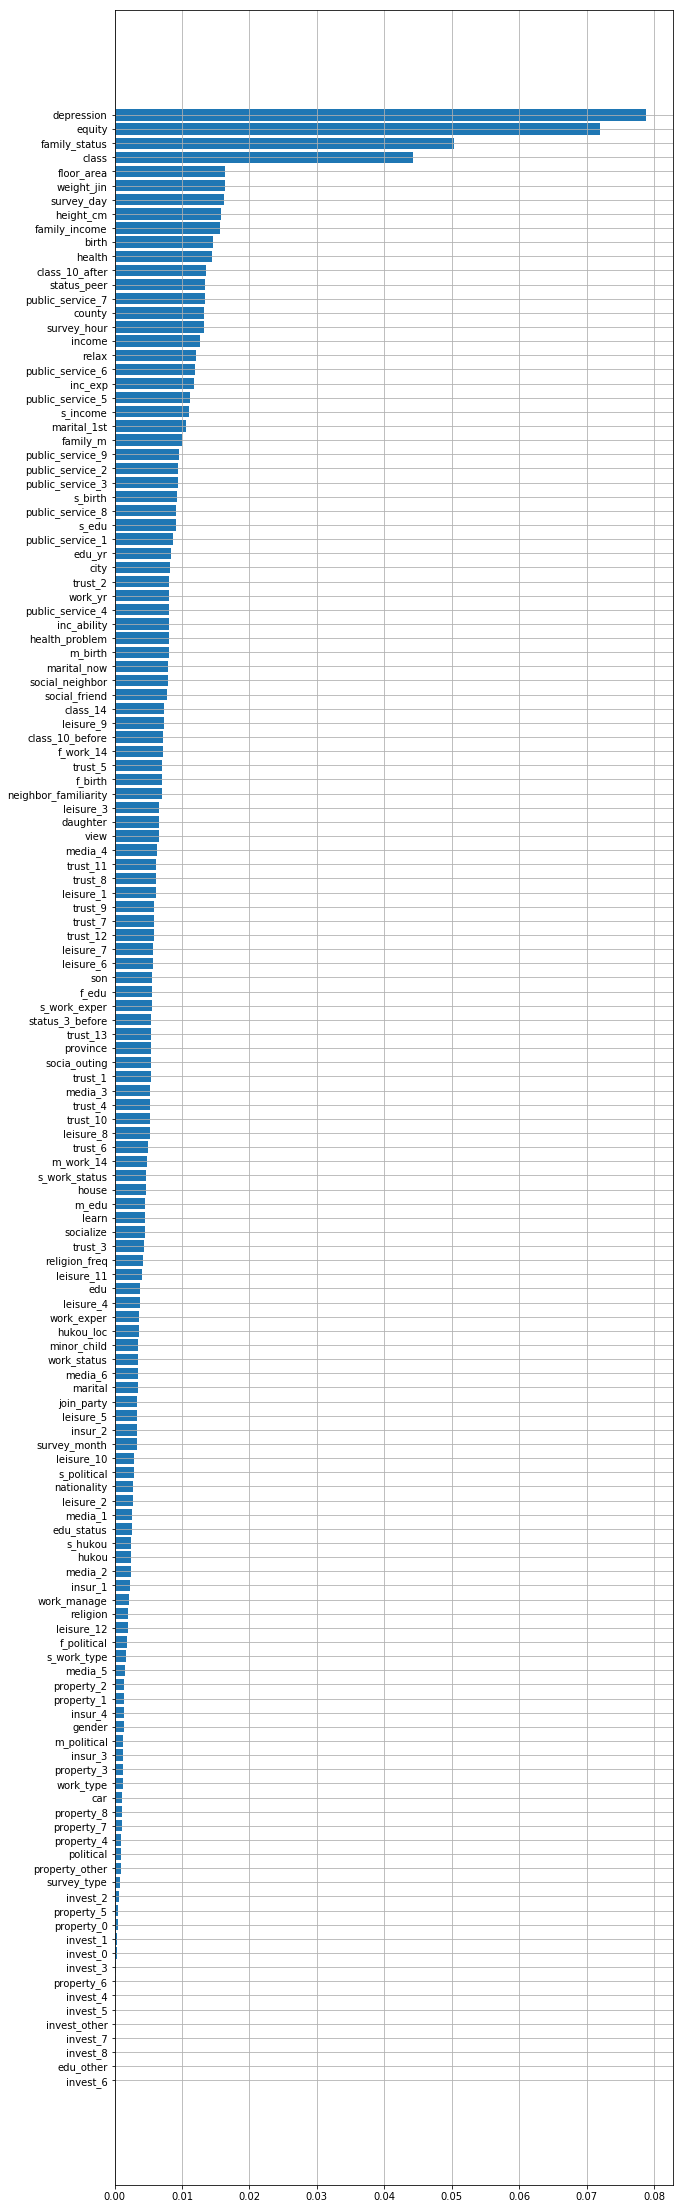

In [12]:
#=============
#特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=ensemble.RandomForestRegressor(n_estimators=20).fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

#参数结论：
# 1、edu_other、property_other、invest_other这三项转换数据都不太重要，而且property、invest的各项数据似乎都不重要
# 2、前十项中equity、depresion反映社会态度和心态；
#     class、family_income、floor_area反映财富;
#     birth、marital_1st、weight_jin、country反映客观状态
#     survey_day为什么也会有影响，这是一个最有疑问的指标
    
    

In [13]:
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
#=============
#8、gdbt
#=============
clf8=ensemble.GradientBoostingRegressor(max_features=20)   #必须要设置参数，不然跑太慢了
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf8.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


Tree:
[0.47633642591899, 0.4020312917792966, 0.5166238715526613, 0.4585656966229876, 0.46647299843701556, 0.4615686153095699, 0.5101788848159109, 0.4242939227167187, 0.4411693407003206, 0.5124651959031992]
0.46697062437566705




<BarContainer object of 140 artists>

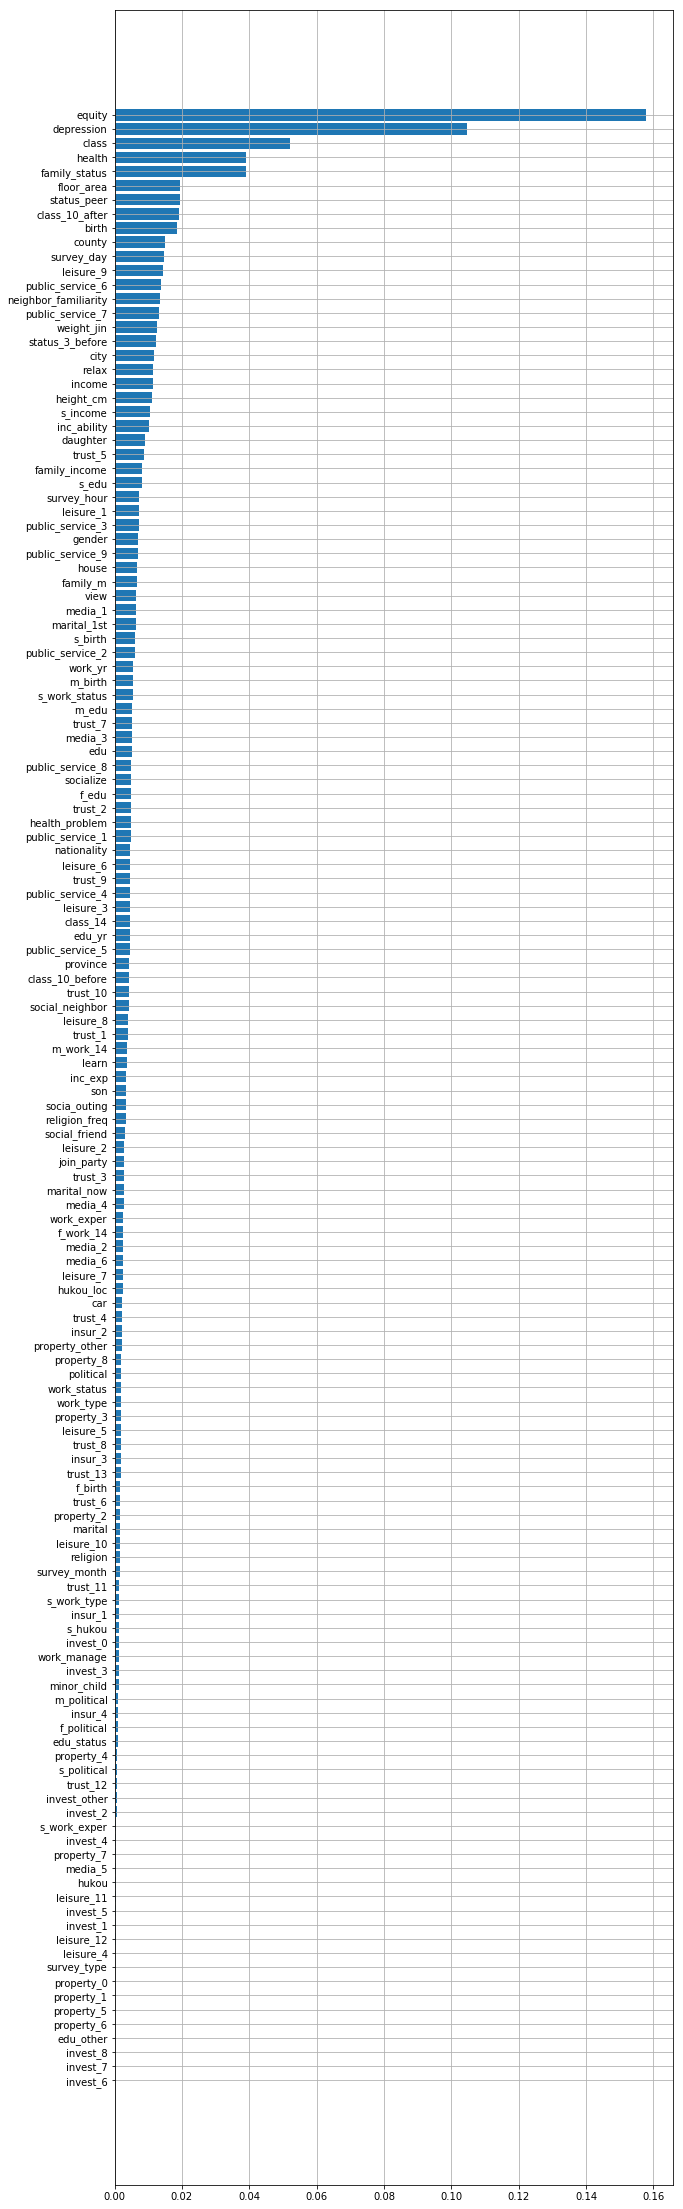

In [14]:
#=============
#特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=ensemble.GradientBoostingClassifier().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

In [3]:
from sklearn import metrics
import xgboost
from sklearn import model_selection
#=============
#9、xgboost
#=============

clf9=xgboost.XGBRegressor()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf9.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:05:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tree:
[0.46722555652665954, 0.4434940767370268, 0.49461371707542634, 0.4184328790795286, 0.5241549262545515, 0.4862385281539855, 0.49866960906644275, 0.43852560633333315, 0.43121803504047984, 0.47868510723180957]
0.4681258041499244




In [1]:
#=============
#特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=xgboost.XGBRegressor().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

NameError: name 'xgboost' is not defined

In [ ]:
#=============
#特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=xgboost.XGBRegressor().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

In [17]:
from sklearn import metrics
import lightgbm
from sklearn import model_selection
#lighgbm防报错
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#=============
#10、LightGBM
#=============

clf10=lightgbm.LGBMRegressor()   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    
    y_pred=clf10.fit(X_train,y_train).predict(X_test)
    e1=metrics.mean_squared_error(y_pred,y_test)
    mes.append(e1)
print('Tree:')
print(mes)
print(np.mean(mes))
print()
print()


Tree:
[0.46138956396442127, 0.4839184463201312, 0.4732814344369148, 0.428570037681299, 0.4760503906588419, 0.4625872568518952, 0.43628526690552966, 0.49643610942149685, 0.5001793091860733, 0.4640331618613549]
0.46827309772879583




<BarContainer object of 140 artists>

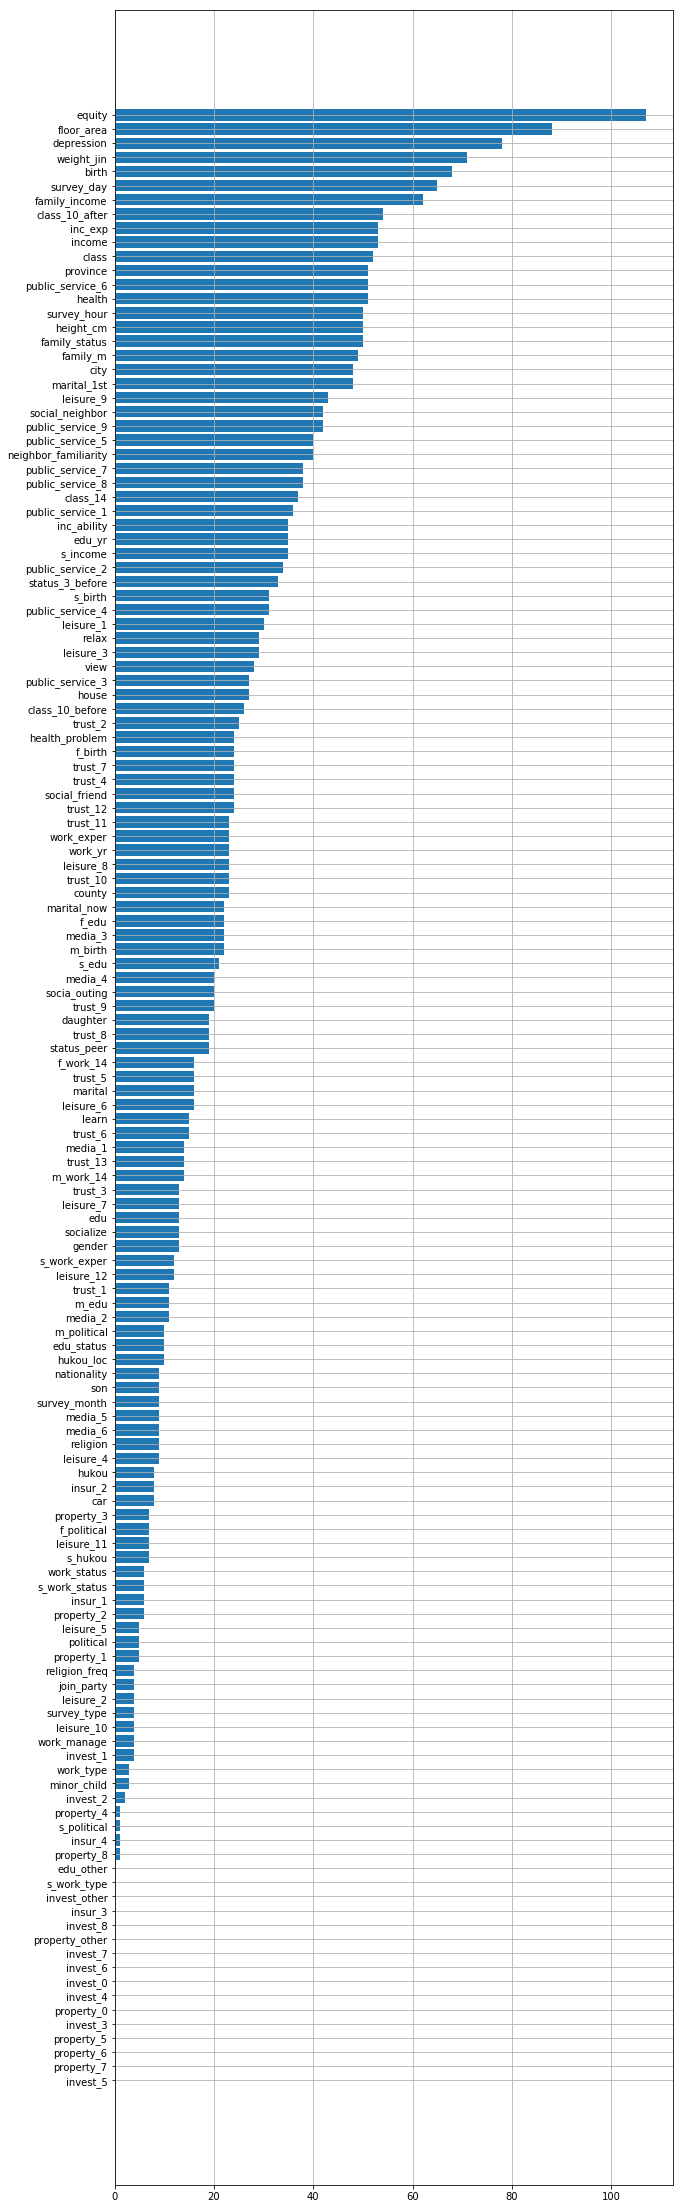

In [18]:
#=============
#特征重要程度排序
import matplotlib.pyplot as plt
%matplotlib inline

a=lightgbm.LGBMRegressor().fit(X,Y).feature_importances_
temp=np.argsort(a)  #返回index

a=list(a)
a.sort()

b=[]
for i in temp:
    b.append(X.columns[i])

plt.figure(figsize=(10,40))
plt.grid()
plt.barh(b,a,)

In [19]:
df1=pd.read_csv(r'./data/happiness_test_complete.csv',encoding='GB2312',index_col='id')

    
    
#转化四列数据，转换后df全为数值格式
df1["survey_month"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[1]).astype("int64")   #返回调查月：用空格来切分日期和时间，日期中第1项为月
df1["survey_day"] = df1["survey_time"].transform(lambda line:line.split(" ")[0].split("/")[2]).astype("int64")   #返回调查日
df1["survey_hour"] = df1["survey_time"].transform(lambda line:line.split(" ")[1].split(":")[0]).astype("int64")   #返回调查小时
df1=df1.drop(columns='survey_time')



def temp1(a):
    if a not in enc1.categories_[0]:
        return 0
    else:
        return a
df1['edu_other']=enc1.transform(df1['edu_other'].transform(temp1).transform(lambda x:str(x)).values.reshape(-1,1))

def temp2(a):
    if a not in enc2.categories_[0]:
        return 0
    else:
        return a
df1['property_other']=enc2.transform(df1['property_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))

def temp3(a):
    if a not in enc3.categories_[0]:
        return 0
    else:
        return a
df1['invest_other']=enc3.transform(df1['invest_other'].transform(temp2).transform(lambda x:str(x)).values.reshape(-1,1))



#确定X_test
X_test=df1.fillna(0)
import xgboost
# 结果1
y_test=xgboost.XGBRegressor().fit(X,Y).predict(X_test)
df1_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
df1_final.to_csv(r'df1_final.csv')
# 结果1四舍五入
df1_final_round=pd.DataFrame({'id':X_test.index,'happiness':np.round(y_test)}).set_index('id')
df1_final_round.to_csv(r'df1_final.csv')


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:14:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
# 结果2

from sklearn import metrics
import xgboost
from sklearn import model_selection
from sklearn.externals import joblib
#=============
#xgboost_modified
#=============

clf_xgboost_modified=xgboost.XGBRegressor(max_depth=4,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.75,reg_alpha=5,reg_lambda=0.1)   
#交叉验证确定准确率，因为对回归值会采用取整操作，所以不用自带的交叉验证模型
mes=[]
i=0

kf=model_selection.KFold(10,shuffle=True)
for train,test in kf.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test1 = X.iloc[test]
    y_test1 = Y.iloc[test]
    
    clf_xgboost_modified.fit(X_train,y_train)
    y_pred=clf_xgboost_modified.predict(X_test1)
    e1=metrics.mean_squared_error(y_pred,y_test1)
    mes.append(e1)
    joblib.dump(clf_xgboost_modified,filename='xgboost_%d.pkl'%i)
    
    y_test=clf_xgboost_modified.predict(X_test)

    df2_final=pd.DataFrame({'id':X_test.index,'happiness':y_test}).set_index('id')
#     df2_final.to_csv('df2_xgboost_%d.csv'%i)
 
    i+=1
print('clf_xgboost_modified:')
print(mes)
print(np.mean(mes))
print()
print()

D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:05:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:06:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:06:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Python\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:06:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
clf_xgboost_modified:
[0.47143198026430333, 0.45757400897032674, 0.45170253001844235, 0.46191925506683773, 0.43322951297974394, 0.45853990698977004, 0.4557542541642247, 0.5070420711643991, 0.47105650954248823, 0.48262331054866653]
0.4650873339709203




In [25]:
#调试最终结果
clf10=lightgbm.LGBMRegressor(metric='l2')   #默认default={l2 for regression}

param_test = {
'max_depth':np.array([9]),
'min_child_weight':np.array([0.0001]),
'min_split_gain':np.array([0.4]),
'subsample':np.array([0.5]),
'colsample_bytree':np.array([1]),  
'reg_alpha':np.array([1e-05]),
'reg_lambda':np.array([0.0001]) ,
'learning_rate':np.array([0.1]),
}

clf=model_selection.GridSearchCV(clf10,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)
joblib.dump(clf_xgboost_modified,filename='xgboost_%d.pkl'%i)
print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.0001, 'min_split_gain': 0.4, 'reg_alpha': 1e-05, 'reg_lambda': 0.0001, 'subsample': 0.5}

clf.cv_results_['mean_test_score']:=[-0.47885624]
-0.47885624435852536
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.0001, 'min_split_gain': 0.4, 'reg_alpha': 1e-05, 'reg_lambda': 0.0001, 'subsample': 0.5}


In [26]:
#调试最终结果
clf8=ensemble.GradientBoostingRegressor(loss='ls')   

param_test = {   
 'max_depth':np.array([2]),
 'min_weight_fraction_leaf':np.array([0.002]), 
 'min_impurity_split':np.array([0.0001]),
 'subsample':np.array([0.96]),
 'max_features':np.array([0.88]),
 'n_estimators':np.array([80]),   
 'learning_rate':np.array([0.2]),    

}

clf=model_selection.GridSearchCV(clf8,param_test,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 0.0001, 'min_split_gain': 0.4, 'reg_alpha': 1e-05, 'reg_lambda': 0.0001, 'subsample': 0.5}

D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split pa

D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split pa

clf.cv_results_['mean_test_score']:=[-0.47948573]
-0.47948572666636086
{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 0.88, 'min_impurity_split': 0.0001, 'min_weight_fraction_leaf': 0.002, 'n_estimators': 80, 'subsample': 0.96}


D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split pa

In [27]:
#调试最终结果

param_test = {   
 'min_samples_split':np.array([4]),          
 'min_weight_fraction_leaf':np.array([0.01]),   
 'min_impurity_decrease':np.array([0]),   
 'n_estimators':[150],  
 'max_features':[0.8],          
}

clf=model_selection.GridSearchCV(clf7,param_test ,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

print("clf.cv_results_['mean_test_score']:=%s"%clf.cv_results_['mean_test_score'])
print(clf.best_score_)
print(clf.best_params_)

# 结论：{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}

clf.cv_results_['mean_test_score']:=[-0.49734107]
-0.49734106661994726
{'max_features': 0.8, 'min_impurity_decrease': 0, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 150}
